In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("wine.data")
data.head

<bound method NDFrame.head of      1  14.23  1.71  2.43  15.6  127  ...   .28  2.29   5.64  1.04  3.92  1065
0    1  13.20  1.78  2.14  11.2  100  ...  0.26  1.28   4.38  1.05  3.40  1050
1    1  13.16  2.36  2.67  18.6  101  ...  0.30  2.81   5.68  1.03  3.17  1185
2    1  14.37  1.95  2.50  16.8  113  ...  0.24  2.18   7.80  0.86  3.45  1480
3    1  13.24  2.59  2.87  21.0  118  ...  0.39  1.82   4.32  1.04  2.93   735
4    1  14.20  1.76  2.45  15.2  112  ...  0.34  1.97   6.75  1.05  2.85  1450
..  ..    ...   ...   ...   ...  ...  ...   ...   ...    ...   ...   ...   ...
172  3  13.71  5.65  2.45  20.5   95  ...  0.52  1.06   7.70  0.64  1.74   740
173  3  13.40  3.91  2.48  23.0  102  ...  0.43  1.41   7.30  0.70  1.56   750
174  3  13.27  4.28  2.26  20.0  120  ...  0.43  1.35  10.20  0.59  1.56   835
175  3  13.17  2.59  2.37  20.0  120  ...  0.53  1.46   9.30  0.60  1.62   840
176  3  14.13  4.10  2.74  24.5   96  ...  0.56  1.35   9.20  0.61  1.60   560

[177 rows x 14 column

In [3]:
x=data.iloc[:,1:].values
y=data.iloc[:,:1].values

In [4]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
14.23,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
1.71,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
2.43,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
15.6,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
127,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
2.8,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
3.06,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
.28,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
2.29,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


In [5]:
scaler = StandardScaler()

In [30]:
x1 = scaler.fit_transform(x)
print(x1)
x1.shape

[[ 0.2558245  -0.50162433 -0.8244853  ...  0.40709978  1.13169801
   0.97105248]
 [ 0.20622873  0.01802001  1.10768971 ...  0.3195674   0.80457911
   1.40099798]
 [ 1.70650069 -0.34931478  0.48793547 ... -0.4244579   1.20281081
   2.34050852]
 ...
 [ 0.34261709  1.73822194 -0.38701171 ... -1.60614514 -1.48525319
   0.28632445]
 [ 0.21862767  0.22408586  0.01400575 ... -1.56237895 -1.39991783
   0.30224836]
 [ 1.40892609  1.57695301  1.36288264 ... -1.51861275 -1.42836295
  -0.58949046]]


(177, 13)

In [49]:
cov = np.cov(x1.T);

In [50]:
cov.shape


(13, 13)

In [51]:
w,v = np.linalg.eig(cov)
w;v

array([[-0.13788809, -0.48583464, -0.20877489,  0.26989127, -0.0011407 ,
        -0.21141036, -0.05751996,  0.01378744, -0.40108372,  0.24221102,
        -0.48825288,  0.27224545,  0.21974133],
       [ 0.24638109, -0.22157478,  0.09019328, -0.06287575,  0.53313643,
        -0.53070694,  0.43373015,  0.02646079, -0.06288444, -0.11060787,
         0.05064287, -0.11946877, -0.30063337],
       [ 0.0043183 , -0.31528188,  0.62374304,  0.16036596, -0.20534831,
        -0.15511547, -0.14513486, -0.14187527,  0.17143391,  0.04222   ,
         0.31451537,  0.48509813, -0.11389638],
       [ 0.23737955,  0.01214349,  0.61379873, -0.06481078,  0.0572236 ,
         0.09411101, -0.29042173,  0.09233892, -0.42777199,  0.06666045,
        -0.20002174, -0.46359328,  0.12325409],
       [-0.1350017 , -0.30028828,  0.13573164, -0.7063438 , -0.39169387,
        -0.0385105 ,  0.31843019,  0.05515582,  0.15196623, -0.07198266,
        -0.27039812, -0.04908458,  0.10540432],
       [-0.39586939, -0.070549

In [52]:
v.shape
v.ndim

2

In [53]:
for i in range(12,1, -1): 
  v = np.delete(v,2, axis = 1)

In [54]:
v.shape
v

array([[-0.13788809, -0.48583464],
       [ 0.24638109, -0.22157478],
       [ 0.0043183 , -0.31528188],
       [ 0.23737955,  0.01214349],
       [-0.1350017 , -0.30028828],
       [-0.39586939, -0.07054905],
       [-0.42439422, -0.00173207],
       [ 0.29913568, -0.02466918],
       [-0.31280321, -0.04144561],
       [ 0.09328558, -0.52801878],
       [-0.29956536,  0.27405069],
       [-0.37720252,  0.16544914],
       [-0.28428101, -0.3695384 ]])

In [58]:
maslo=x1@v
klasy=np.hstack((y,maslo))
klasy.shape
print(klasy)


[[ 1.         -2.23024297  0.30231277]
 [ 1.         -2.53192196 -1.06225676]
 [ 1.         -3.75467731 -2.80530871]
 [ 1.         -1.0201307  -0.88838036]
 [ 1.         -3.04919938 -2.1700067 ]
 [ 1.         -2.45822831 -1.20706466]
 [ 1.         -2.06160512 -1.64048497]
 [ 1.         -2.51844454 -0.96083709]
 [ 1.         -2.76797089 -0.82452149]
 [ 1.         -3.48916135 -1.35519047]
 [ 1.         -1.76638133 -0.6467145 ]
 [ 1.         -2.12870494 -0.71042819]
 [ 1.         -3.46649467 -1.1821256 ]
 [ 1.         -4.31363172 -2.15473286]
 [ 1.         -2.30845048 -1.70092988]
 [ 1.         -2.16745547 -2.36700104]
 [ 1.         -1.90220844 -1.66778153]
 [ 1.         -3.54012997 -2.57341412]
 [ 1.         -2.09274066 -1.08886084]
 [ 1.         -3.1319081  -0.82827339]
 [ 1.         -1.10804505 -0.25248228]
 [ 1.         -2.55760384  0.06025432]
 [ 1.         -1.67255267  0.49502043]
 [ 1.         -1.78792909  0.29470798]
 [ 1.         -1.00222687 -0.95757325]
 [ 1.         -1.79246479

In [66]:
var = np.array([])
var2 = np.array([])
var3 = np.array([])
for i in range(0,176):
  if klasy[i,0]==1:
    var = np.append(var,klasy[i,:])
  if klasy[i,0]==2:
    var2 = np.append(var2,klasy[i,:])
  if klasy[i,0]==3:
    var3 = np.append(var3,klasy[i,:])
print(var.shape)
var = var.reshape(58,3)
var2 = var2.reshape(71,3)
var3 = var3.reshape(47,3)

(174,)


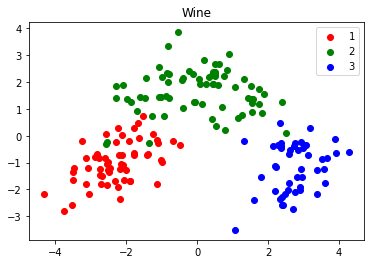

In [68]:
plt.scatter(var[:,1],var[:,2],c='red')
plt.scatter(var2[:,1],var2[:,2],c='green')
plt.scatter(var3[:,1],var3[:,2],c='blue')
plt.title('Wine')
plt.legend(['1','2','3'])
plt.show()